In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
day=pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Hence there is no null values in whole day data

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Here our target variable is 'cnt' (count the total number of bike rentals)

In [7]:
day['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

## Visaulising the Data

#### Checking the outliers for categorical variables

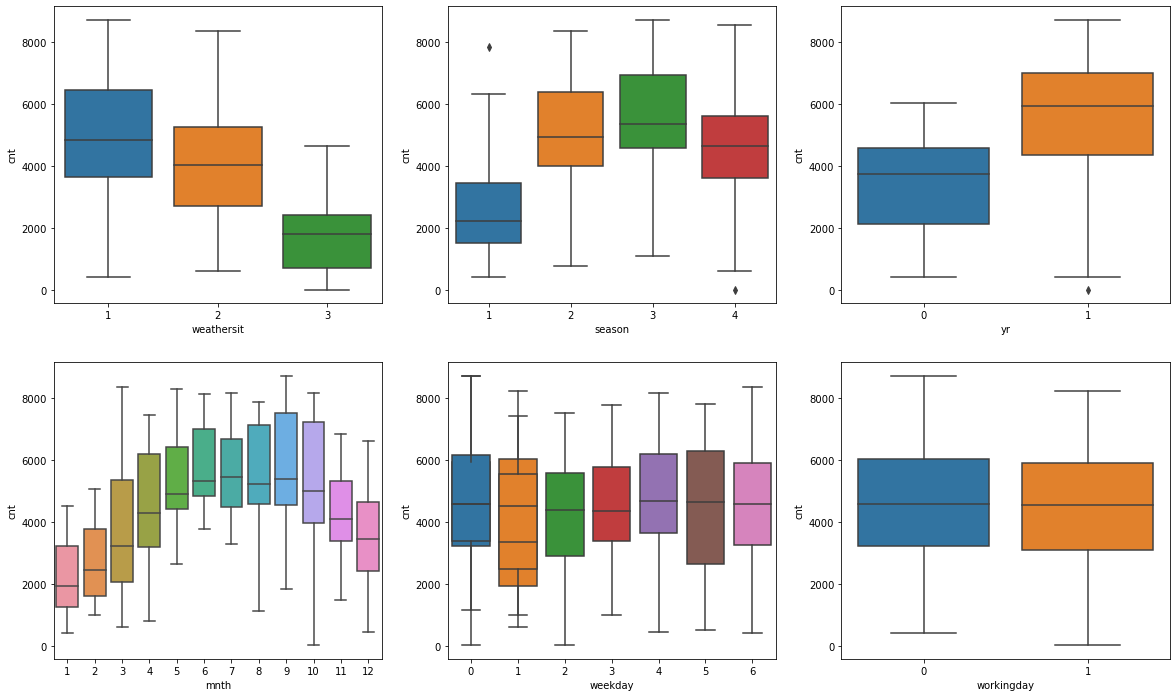

In [8]:
#boxplot
plt.figure(figsize=[20,12])
plt.subplot(2,3,1)
sns.boxplot(x='weathersit', y='cnt', data=day)
plt.subplot(2,3,2)
sns.boxplot(x='season', y='cnt', data=day)
plt.subplot(2,3,3)
sns.boxplot(x='yr', y='cnt', data=day)
plt.subplot(2,3,4)
sns.boxplot(x='mnth', y='cnt', data=day)
plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='cnt', data=day)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=day)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=day)

The above plots shows outliers so as per the observations we can see that there is only season and yr(year) have outliers but they are very few so we can keep them.

#### Checking the outliers for Numeric variables

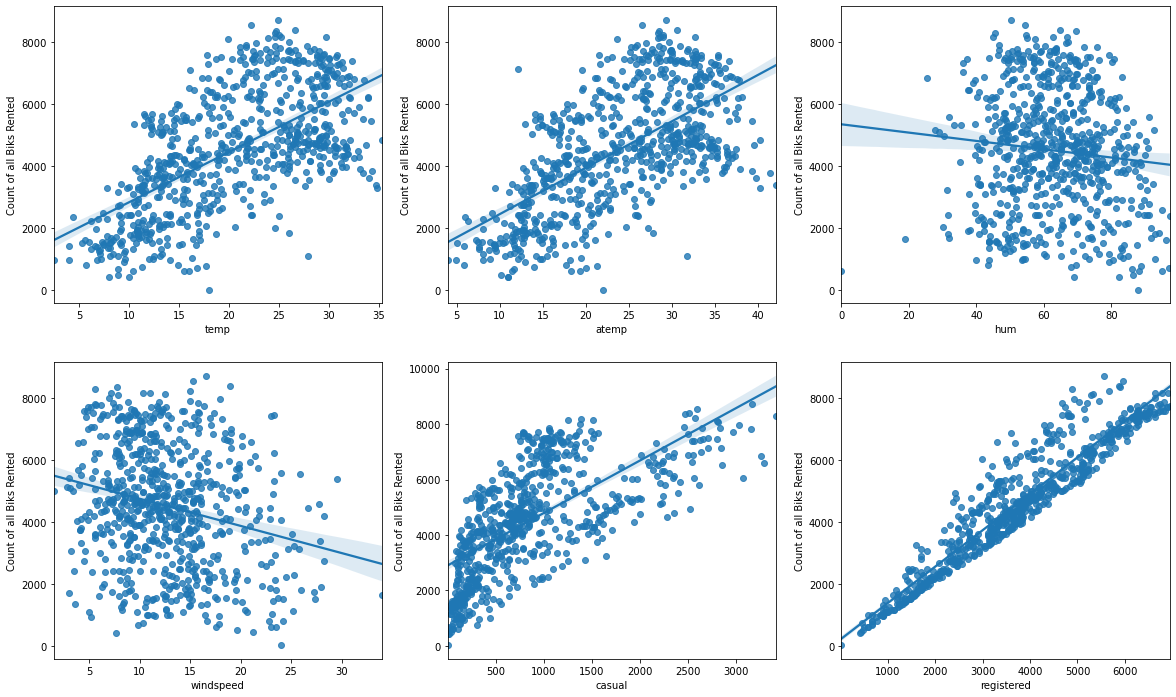

In [9]:
plt.figure(figsize=[20,12])
plt.subplot(2,3,1)
sns.regplot(x=day['temp'], y=day['cnt'], data=day)
plt.xlabel('temp')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,2)
sns.regplot(x=day['atemp'], y=day['cnt'], data=day)
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,3)
sns.regplot(x=day['hum'], y=day['cnt'], data=day)
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,4)
sns.regplot(x=day['windspeed'], y=day['cnt'], data=day)
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,5)
sns.regplot(x=day['casual'], y=day['cnt'], data=day)
plt.xlabel('casual')
plt.ylabel('Count of all Biks Rented')

plt.subplot(2,3,6)
sns.regplot(x=day['registered'], y=day['cnt'], data=day)
plt.xlabel('registered')
plt.ylabel('Count of all Biks Rented')
plt.show()

1-As per the above plotting we can see there is a liner relation between number of bike rented and temperature the warmmer the temp the more bike get rented.
2-In the plotting temp and atemp is very similar distributions and outliers so, we can drop the atemp.
3-Hum(humidity) and windspeed indicates large outliers.

### We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for mnth with yr as the hue.

In [10]:
months={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
day['mnth']=day['mnth'].map(months)

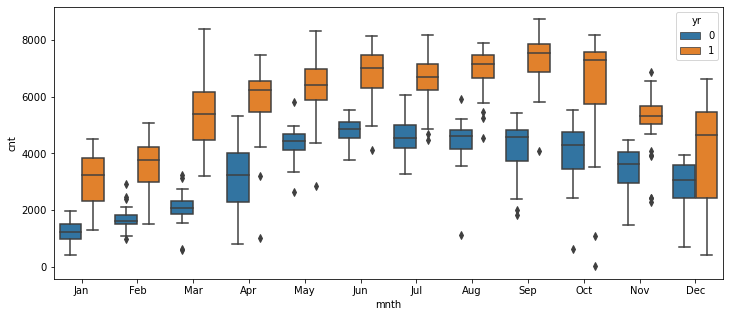

In [11]:
plt.figure(figsize = (12, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = day)
plt.show()

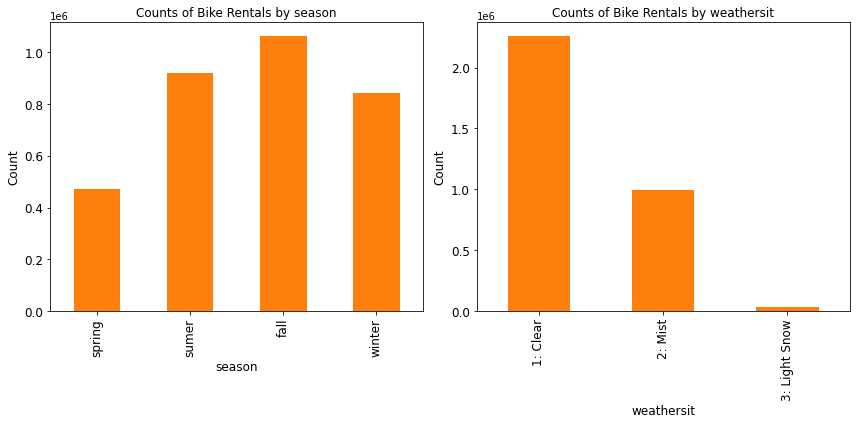

In [12]:
#bar graph for categorical variables showing the bike rented out. 
f, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax1 = day[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = day[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

The above bar graphs of 'weathersit' shows that people tends to rent more bike in clear weather and 'season' shows the fall is the top season to rent bike.

In [13]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [14]:
#pair plot for numerical varirables 
x=day[[ 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']]
x.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


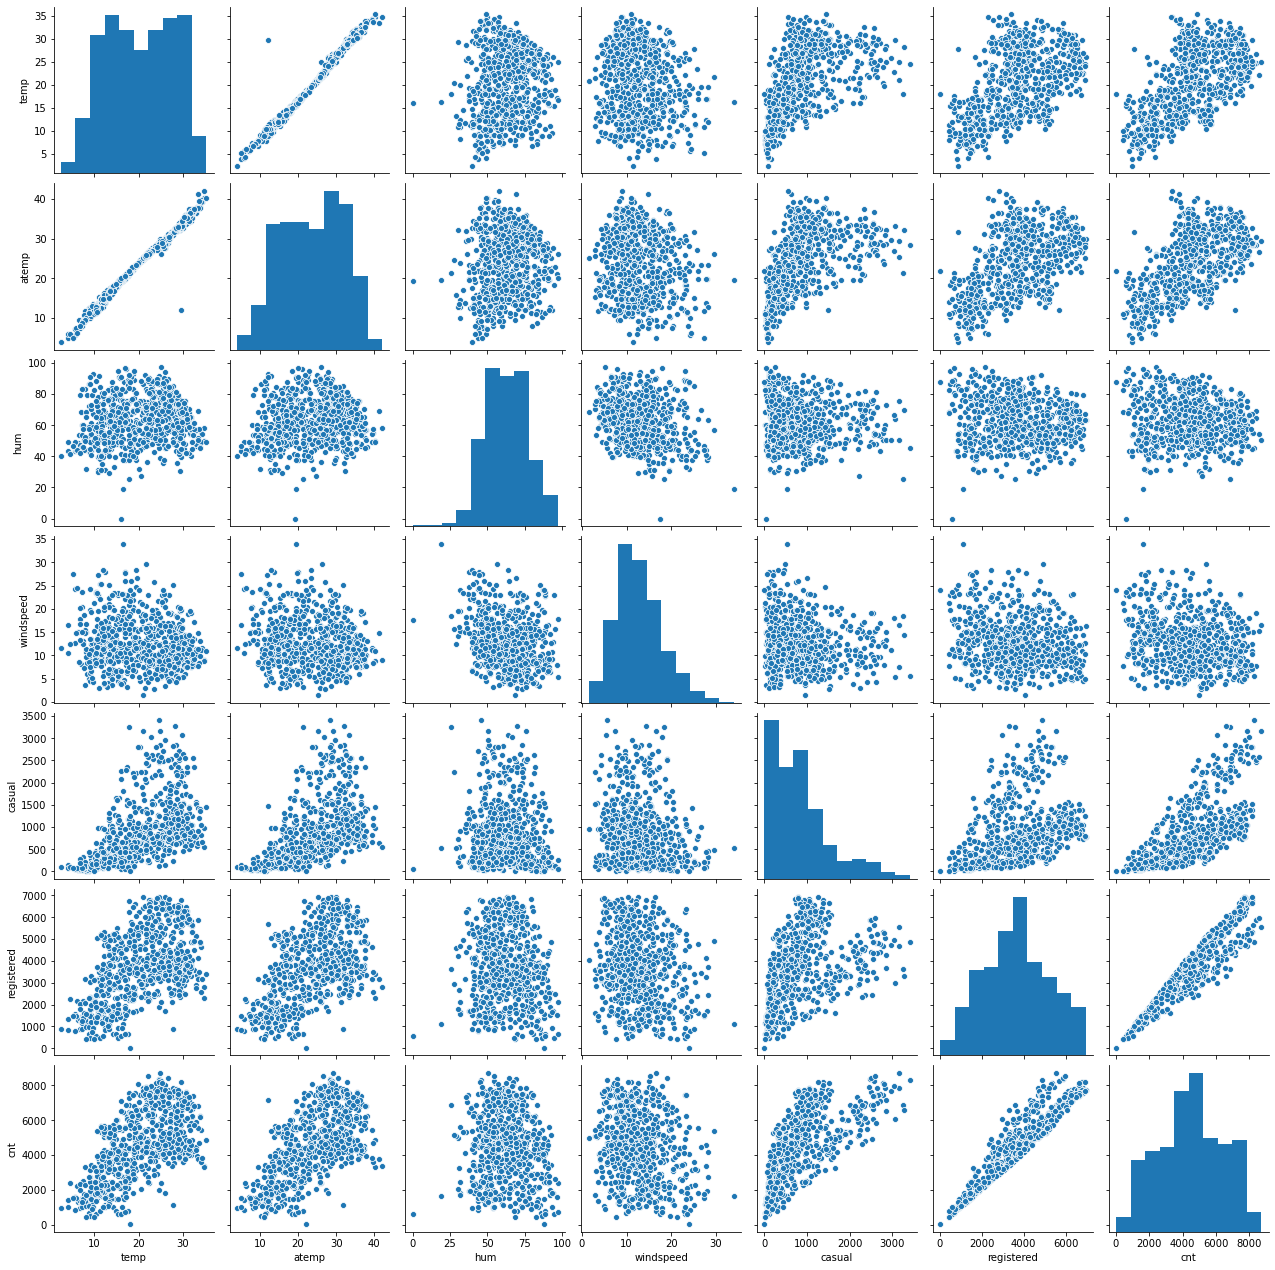

In [15]:
sns.pairplot(x)
plt.show()

Above pair-plot among the numerical variables indicatesthat "temp" and "atemp"  has the highest correlation
with the target variable

# Data Preparation

In [16]:
weekdays={0:'Mon', 1:'Tues', 2:'Wed', 3:'Thr', 4:'Fri', 5:'Sat', 6:'Sun'}
day['weekday']=day['weekday'].map(weekdays)

In [17]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,Jan,0,Tues,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,Jan,0,Wed,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,Jan,0,Thr,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,Jan,0,Fri,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,Jan,0,Sat,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
seasons={1:'spring', 2:'summer', 3:'fall', 4:'winter'}
day['season']=day['season'].map(seasons)

In [19]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Tues,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Wed,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Thr,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Fri,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Sat,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
weather={1:'Clear', 2:'Mist', 3:'Light snow', 4:'Heavy rain'}
day['weathersit']=day['weathersit'].map(weather)

In [21]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Tues,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Wed,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Thr,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
#drop casual and registered columns because cnt is the sum of casual and registered.
day=day.drop(['casual', 'registered'], axis=1)
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,Jan,0,Tues,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,Jan,0,Wed,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,Jan,0,Thr,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variables 

In [23]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.0+ KB


In [24]:
# first drop some unnecessary columns
day=day.drop(['instant', 'dteday'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Tues,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Wed,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Thr,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Select all categorical variables
day_categorical = day.select_dtypes(include=['object'])
day_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [26]:
#convert into dummies

day_dummies = pd.get_dummies(day_categorical,drop_first=True)
day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
day = pd.concat([day, day_dummies], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,spring,0,Jan,0,Tues,1,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,1
1,spring,0,Jan,0,Wed,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,1
2,spring,0,Jan,0,Thr,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,0,0,0
3,spring,0,Jan,0,Fri,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,Jan,0,Sat,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,1,0,0,0,0,0,0


In [28]:
#now drop object columns for model building
day=day.drop(['season', 'weathersit', 'mnth', 'weekday'], axis=1)
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


# Model Building 

### Split into train and test

In [29]:
import sklearn
from sklearn.model_selection import train_test_split

In [30]:
df_train, df_test= train_test_split(day, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Residual Analysis 

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
# 1. Instantiate an object
scaler=MinMaxScaler()

#create alist of numeric vars
#temp and atemp have most similar values so we take only temp here

num_vars=['temp', 'hum', 'windspeed', 'cnt']

# 2.Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [33]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Training the model 

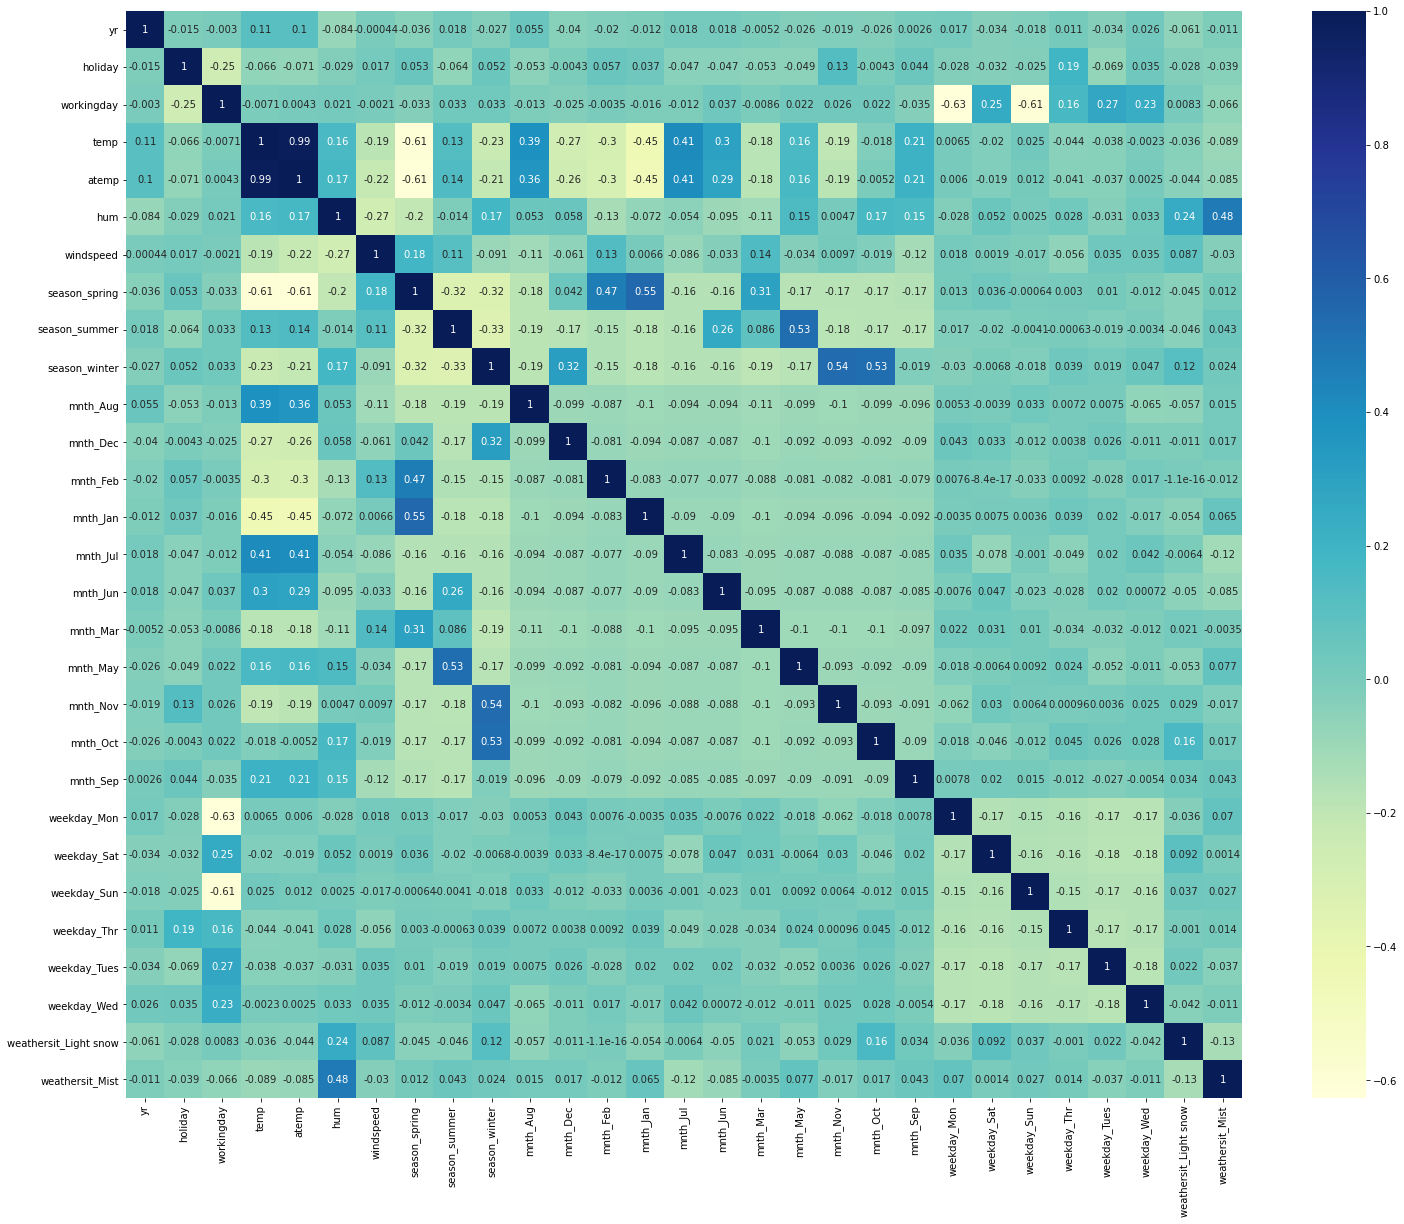

In [68]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

We can see that temperature,Summer season,June to october months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

In [35]:
#X_train, y_train
y_train=df_train.pop("cnt")
X_train=df_train

In [36]:
#pop removes all the columns except cnt
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [37]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
576,1,0,1,0.815169,33.1448,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,20.6746,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,11.5850,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,18.8752,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.345824,16.0977,0.751824,0.380981,0,1,0,...,0,0,1,0,0,0,0,0,0,1


#### Adding all the variables to the model

In [38]:
import statsmodels.api as sm
import statsmodels
import sklearn
from sklearn.model_selection import train_test_split

In [39]:
#checking all the columns
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thr', 'weekday_Tues',
       'weekday_Wed', 'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [40]:
X_train.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
atemp                    float64
hum                      float64
windspeed                float64
season_spring              uint8
season_summer              uint8
season_winter              uint8
mnth_Aug                   uint8
mnth_Dec                   uint8
mnth_Feb                   uint8
mnth_Jan                   uint8
mnth_Jul                   uint8
mnth_Jun                   uint8
mnth_Mar                   uint8
mnth_May                   uint8
mnth_Nov                   uint8
mnth_Oct                   uint8
mnth_Sep                   uint8
weekday_Mon                uint8
weekday_Sat                uint8
weekday_Sun                uint8
weekday_Thr                uint8
weekday_Tues               uint8
weekday_Wed                uint8
weathersit_Light snow      uint8
weathersit_Mist            uint8
dtype: object

In [41]:
#add a constant
X_train_sm= sm.add_constant(X_train['temp'])

#create first model
lr= sm.OLS(y_train, X_train_sm.astype(float))

#fit
lr_model=lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [42]:
#build a variables with all variables 
X_train_sm=sm.add_constant(X_train)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.24e-177
Time:                        15:02:28   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3900      0.086      4.515      0.000       0.220       0.560
yr                        0.2312      0.008     28.360      0.000       0.215       0.247
holiday                  -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday               -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp                      0.3873      0.143      2.699      0.007       0.105       0.669
atemp                     0.0014      0.004      0.392      0.695      -0.006       0.009
hum                      -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed                -0.1802      0.027     -6.751      0.000      -0.233      -0.128
season_spring            -0.0409      0.030     -1.349      0.178      -0.100       0.019
season_summer             0.0458      0.026      1.733      0.084      -0.006       0.098
season_winter             0.1121      0.028      3.969      0.000       0.057       0.168
mnth_Aug                  0.0291      0.034      0.849      0.396      -0.038       0.096
mnth_Dec                 -0.0444      0.034     -1.308      0.191      -0.111       0.022
mnth_Feb                 -0.0373      0.033     -1.119      0.264      -0.103       0.028
mnth_Jan                 -0.0640      0.034     -1.887      0.060      -0.131       0.003
mnth_Jul                 -0.0274      0.035     -0.773      0.440      -0.097       0.042
mnth_Jun                  0.0097      0.025      0.384      0.701      -0.040       0.059
mnth_Mar                  0.0010      0.025      0.041      0.967      -0.048       0.050
mnth_May                  0.0256      0.021      1.196      0.232      -0.016       0.068
mnth_Nov                 -0.0395      0.037     -1.076      0.282      -0.112       0.033
mnth_Oct                  0.0058      0.036      0.159      0.874      -0.065       0.077
mnth_Sep                  0.0916      0.032      2.837      0.005       0.028       0.155
weekday_Mon              -0.0541      0.072     -0.753      0.452      -0.195       0.087
weekday_Sat              -0.0042      0.015     -0.280      0.780      -0.034       0.025
weekday_Sun              -0.0599      0.072     -0.833      0.405      -0.201       0.081
weekday_Thr              -0.0144      0.015     -0.935      0.350      -0.045       0.016
weekday_Tues             -0.0289      0.015     -1.953      0.051      -0.058       0.000
weekday_Wed              -0.0303      0.015     -2.055      0.040      -0.059      -0.001
weathersit_Light snow    -0.2492      0.027     -9.324      0.000      -0.302      -0.197
weathersit_Mist          -0.0578      0.011     -5.486      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       78.

# VIF
Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:



### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,atemp,514.15
3,temp,444.42
2,workingday,68.60
5,hum,41.47
7,season_spring,13.60
21,weekday_Mon,13.40
23,weekday_Sun,12.66
9,season_winter,12.44
8,season_summer,9.95
18,mnth_Nov,7.17


#### Some features rows have very large values of VIF and we want only those features less than value 5. So, our data is large we can drop multiple columns together. And then check the VIF value. 

In [45]:
#drop the  column because the value of VIF is higher than 5
X=X_train.drop(['temp', 'workingday', 'atemp', 'hum'], axis=1)

In [46]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     89.06
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.28e-163
Time:                        15:02:28   Log-Likelihood:                 478.22
No. Observations:                 510   AIC:                            -904.4
Df Residuals:                     484   BIC:                            -794.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5027      0.036     14.137      0.000       0.433       0.573
yr                        0.2455      0.009     28.242      0.000       0.228       0.263
holiday                  -0.0675      0.029     -2.364      0.018      -0.124      -0.011
windspeed                -0.1646      0.027     -6.041      0.000      -0.218      -0.111
season_spring            -0.0760      0.033     -2.326      0.020      -0.140      -0.012
season_summer             0.0053      0.028      0.186      0.852      -0.050       0.061
season_winter             0.0877      0.031      2.871      0.004       0.028       0.148
mnth_Aug                  0.1101      0.035      3.123      0.002       0.041       0.179
mnth_Dec                 -0.1379      0.035     -3.912      0.000      -0.207      -0.069
mnth_Feb                 -0.1333      0.035     -3.859      0.000      -0.201      -0.065
mnth_Jan                 -0.1947      0.034     -5.773      0.000      -0.261      -0.128
mnth_Jul                  0.0835      0.036      2.326      0.020       0.013       0.154
mnth_Jun                  0.1108      0.024      4.549      0.000       0.063       0.159
mnth_Mar                 -0.0398      0.027     -1.498      0.135      -0.092       0.012
mnth_May                  0.0777      0.022      3.574      0.000       0.035       0.120
mnth_Nov                 -0.1113      0.039     -2.846      0.005      -0.188      -0.034
mnth_Oct                 -0.0120      0.039     -0.307      0.759      -0.089       0.065
mnth_Sep                  0.1272      0.034      3.702      0.000       0.060       0.195
weekday_Mon               0.0028      0.016      0.169      0.866      -0.030       0.035
weekday_Sat              -0.0064      0.016     -0.392      0.695      -0.038       0.026
weekday_Sun              -0.0005      0.017     -0.028      0.978      -0.033       0.032
weekday_Thr              -0.0218      0.017     -1.305      0.193      -0.055       0.011
weekday_Tues             -0.0399      0.016     -2.494      0.013      -0.071      -0.008
weekday_Wed              -0.0371      0.016     -2.321      0.021      -0.069      -0.006
weathersit_Light snow    -0.2985      0.027    -11.208      0.000      -0.351      -0.246
weathersit_Mist          -0.0858      0.009     -9.146      0.000      -0.104      -0.067
==============================================================================
Omnibus:                       77.922   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.789
Skew:                          -0.682   Prob(JB):                     2.35e-57
Kurtosis:                       6.226   Cond. No.                         29.7
==============================================================================

In [47]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
5,season_winter,11.27
3,season_spring,10.82
14,mnth_Nov,5.25
15,mnth_Oct,5.12
2,windspeed,4.85
9,mnth_Jan,4.53
4,season_summer,4.27
7,mnth_Dec,4.15
8,mnth_Feb,3.65
12,mnth_Mar,3.09


In [48]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     89.06
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.28e-163
Time:                        15:02:29   Log-Likelihood:                 478.22
No. Observations:                 510   AIC:                            -904.4
Df Residuals:                     484   BIC:                            -794.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5027      0.036     14.137      0.000       0.433       0.573
yr                        0.2455      0.009     28.242      0.000       0.228       0.263
holiday                  -0.0675      0.029     -2.364      0.018      -0.124      -0.011
windspeed                -0.1646      0.027     -6.041      0.000      -0.218      -0.111
season_spring            -0.0760      0.033     -2.326      0.020      -0.140      -0.012
season_summer             0.0053      0.028      0.186      0.852      -0.050       0.061
season_winter             0.0877      0.031      2.871      0.004       0.028       0.148
mnth_Aug                  0.1101      0.035      3.123      0.002       0.041       0.179
mnth_Dec                 -0.1379      0.035     -3.912      0.000      -0.207      -0.069
mnth_Feb                 -0.1333      0.035     -3.859      0.000      -0.201      -0.065
mnth_Jan                 -0.1947      0.034     -5.773      0.000      -0.261      -0.128
mnth_Jul                  0.0835      0.036      2.326      0.020       0.013       0.154
mnth_Jun                  0.1108      0.024      4.549      0.000       0.063       0.159
mnth_Mar                 -0.0398      0.027     -1.498      0.135      -0.092       0.012
mnth_May                  0.0777      0.022      3.574      0.000       0.035       0.120
mnth_Nov                 -0.1113      0.039     -2.846      0.005      -0.188      -0.034
mnth_Oct                 -0.0120      0.039     -0.307      0.759      -0.089       0.065
mnth_Sep                  0.1272      0.034      3.702      0.000       0.060       0.195
weekday_Mon               0.0028      0.016      0.169      0.866      -0.030       0.035
weekday_Sat              -0.0064      0.016     -0.392      0.695      -0.038       0.026
weekday_Sun              -0.0005      0.017     -0.028      0.978      -0.033       0.032
weekday_Thr              -0.0218      0.017     -1.305      0.193      -0.055       0.011
weekday_Tues             -0.0399      0.016     -2.494      0.013      -0.071      -0.008
weekday_Wed              -0.0371      0.016     -2.321      0.021      -0.069      -0.006
weathersit_Light snow    -0.2985      0.027    -11.208      0.000      -0.351      -0.246
weathersit_Mist          -0.0858      0.009     -9.146      0.000      -0.104      -0.067
==============================================================================
Omnibus:                       77.922   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.789
Skew:                          -0.682   Prob(JB):                     2.35e-57
Kurtosis:                       6.226   Cond. No.                         29.7
==============================================================================

In [49]:
#drop another column which higher than VIF 5.
X=X.drop(["season_winter","season_spring"], axis=1)

In [50]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     89.56
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          2.24e-158
Time:                        15:02:29   Log-Likelihood:                 461.19
No. Observations:                 510   AIC:                            -874.4
Df Residuals:                     486   BIC:                            -772.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4688      0.032     14.533      0.000       0.405       0.532
yr                        0.2474      0.009     27.607      0.000       0.230       0.265
holiday                  -0.0809      0.029     -2.757      0.006      -0.139      -0.023
windspeed                -0.1843      0.028     -6.612      0.000      -0.239      -0.130
season_summer             0.0475      0.022      2.130      0.034       0.004       0.091
mnth_Aug                  0.1491      0.031      4.768      0.000       0.088       0.211
mnth_Dec                 -0.0598      0.032     -1.887      0.060      -0.122       0.002
mnth_Feb                 -0.1671      0.032     -5.162      0.000      -0.231      -0.103
mnth_Jan                 -0.2299      0.031     -7.317      0.000      -0.292      -0.168
mnth_Jul                  0.1225      0.032      3.822      0.000       0.059       0.185
mnth_Jun                  0.1238      0.024      5.101      0.000       0.076       0.171
mnth_Mar                 -0.0622      0.026     -2.420      0.016      -0.113      -0.012
mnth_May                  0.0750      0.022      3.343      0.001       0.031       0.119
mnth_Nov                  0.0178      0.031      0.566      0.572      -0.044       0.080
mnth_Oct                  0.1153      0.032      3.628      0.000       0.053       0.178
mnth_Sep                  0.1855      0.032      5.793      0.000       0.123       0.248
weekday_Mon               0.0023      0.017      0.137      0.891      -0.031       0.036
weekday_Sat              -0.0093      0.017     -0.553      0.581      -0.042       0.024
weekday_Sun              -0.0041      0.017     -0.241      0.810      -0.038       0.030
weekday_Thr              -0.0209      0.017     -1.212      0.226      -0.055       0.013
weekday_Tues             -0.0437      0.016     -2.654      0.008      -0.076      -0.011
weekday_Wed              -0.0358      0.016     -2.169      0.031      -0.068      -0.003
weathersit_Light snow    -0.2939      0.027    -10.711      0.000      -0.348      -0.240
weathersit_Mist          -0.0847      0.010     -8.752      0.000      -0.104      -0.066
==============================================================================
Omnibus:                       76.075   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.692
Skew:                          -0.713   Prob(JB):                     1.97e-48
Kurtosis:                       5.882   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,4.50
3,season_summer,3.20
0,yr,2.00
19,weekday_Tues,1.99
20,weekday_Wed,1.96
16,weekday_Sat,1.95
18,weekday_Thr,1.91
15,weekday_Mon,1.89
7,mnth_Jan,1.82
17,weekday_Sun,1.81


##### Now drop those columns whose p-values is greater then 0.05 

In [52]:
#drop another columns which has higher p-values than 0.05.
X=X.drop(['mnth_Nov', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thr'], axis=1)

In [53]:
#creating another model
X_train_sm=sm.add_constant(X)

#create model
lr= sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          6.87e-163
Time:                        15:02:29   Log-Likelihood:                 459.85
No. Observations:                 510   AIC:                            -881.7
Df Residuals:                     491   BIC:                            -801.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4759      0.018     26.941      0.000       0.441       0.511
yr                        0.2473      0.009     27.704      0.000       0.230       0.265
holiday                  -0.0872      0.029     -3.042      0.002      -0.144      -0.031
windspeed                -0.1838      0.028     -6.655      0.000      -0.238      -0.130
season_summer             0.0387      0.016      2.473      0.014       0.008       0.070
mnth_Aug                  0.1356      0.020      6.847      0.000       0.097       0.174
mnth_Dec                 -0.0737      0.020     -3.621      0.000      -0.114      -0.034
mnth_Feb                 -0.1804      0.022     -8.301      0.000      -0.223      -0.138
mnth_Jan                 -0.2443      0.020    -12.194      0.000      -0.284      -0.205
mnth_Jul                  0.1106      0.021      5.258      0.000       0.069       0.152
mnth_Jun                  0.1158      0.020      5.842      0.000       0.077       0.155
mnth_Mar                 -0.0720      0.018     -3.975      0.000      -0.108      -0.036
mnth_May                  0.0698      0.021      3.366      0.001       0.029       0.111
mnth_Oct                  0.1009      0.020      4.944      0.000       0.061       0.141
mnth_Sep                  0.1725      0.021      8.329      0.000       0.132       0.213
weekday_Tues             -0.0375      0.013     -2.986      0.003      -0.062      -0.013
weekday_Wed              -0.0294      0.013     -2.333      0.020      -0.054      -0.005
weathersit_Light snow    -0.2955      0.027    -10.891      0.000      -0.349      -0.242
weathersit_Mist          -0.0844      0.010     -8.798      0.000      -0.103      -0.066
==============================================================================
Omnibus:                       74.734   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.412
Skew:                          -0.686   Prob(JB):                     1.13e-49
Kurtosis:                       5.954   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,windspeed,3.65
3,season_summer,2.68
0,yr,1.92
11,mnth_May,1.73
17,weathersit_Mist,1.56
10,mnth_Mar,1.35
7,mnth_Jan,1.33
12,mnth_Oct,1.32
9,mnth_Jun,1.32
6,mnth_Feb,1.31


The above all VIF value is less then 5 so, now there is no multicollinearity in all features.

- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

- A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5, we are in good shape, and can proceed with our regression

- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.806 or 80.6%

- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.808 or 80.8%

### Residual Analysis

In [55]:
y_train_pred=lr_model.predict(X_train_sm)

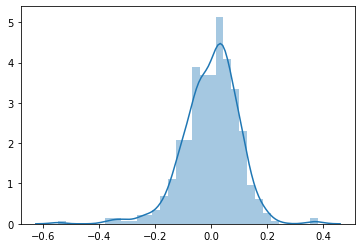

In [56]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

We can see Error terms are normally distributed

### Evaluation on the test set

In [57]:
#create alist of numeric vars
#temp and atemp have most similar values so we take only temp here

num_vars=['temp', 'hum', 'windspeed', 'cnt']

# 2.Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test[num_vars].head()

,temp,hum,windspeed,cnt
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [58]:
df_test[num_vars].describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.638221,0.313293,0.522154
std,0.233187,0.148694,0.159584,0.219163
min,0.046591,0.261915,-0.042808,0.048205
25%,0.355429,0.529197,0.198843,0.378595
50%,0.558172,0.625590,0.300126,0.524678
75%,0.755981,0.743798,0.402718,0.677750
max,0.984424,1.002146,0.807474,0.963300


In [59]:
y_test=df_test.pop("cnt")

In [60]:
X_test=df_test

In [61]:
#add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thr,weekday_Tues,weekday_Wed,weathersit_Light snow,weathersit_Mist
184,1.0,0,1,0,0.831783,33.27085,0.657364,0.084219,0,0,...,0,0,0,0,0,1,0,0,0,1
535,1.0,1,0,1,0.901354,36.04875,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0,0.511964,22.85230,0.837699,0.334206,0,0,...,1,0,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.881625,34.24915,0.437098,0.339570,0,0,...,0,0,0,1,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,32.19710,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [62]:
#dropping columns again whose VIF value is greater than 5 and p-value is greater then 0.05
X_test_sm=X_test_sm.drop(['temp', 'workingday', 'atemp', 'hum', 'season_winter', 'season_spring', 
                          'mnth_Nov', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thr'], axis=1)

In [63]:
#predict
y_test_pred=lr_model.predict(X_test_sm)

In [64]:
from sklearn.metrics import r2_score

In [65]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7695850811017204

In [75]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.801)*(19-1)/(19-1-1)
print(Adj_r2)

0.7892941176470589


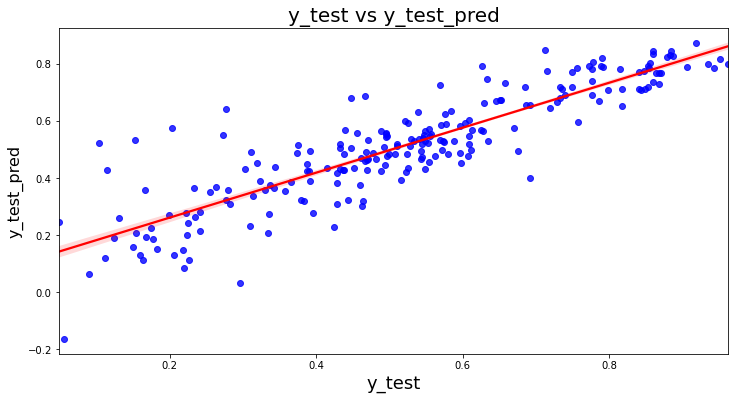

In [74]:
#Regression plot for best fitted line 
plt.figure(figsize=(12,6))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

# We can see that the equation for best fitted line is:

### cnt = 0.247 X yr - 0.087 X holiday - 0.183 X windspeed +  0.038 X season_summer  + 0.135 X mnth_Aug - 0.073 X mnth_Dec - 0.180 X mnth_Feb - 0.244 X mnth_Jan + 0.110 X mnth_Jul +0.115 X mnth_Jun + 0.072 X mnth_Mar + 0.069 X mnth_May + 0.100 X mnth_Oct + 0.172 X mnth_Sep -0.037 X weekday_Tues - 0.029 X weekday_Wed - 0.295 X weather_Light_snow - 0.084 X weather_Mist

## We can see the demand for bikes depends mainly on below variables:

#### yr , holiday ,windspeed, season_summer, mnth_aug, mnth_Dec, mnth_Feb, mnth_Jan, mnth_Jul, mnth_Jun, mnth_Mar, mnth_May, mnth_Oct, mnth_Sep, weekday_Tues, weekday_Wed, weathet_Light_snow, weather_Mist.

##### Demands increases in the month of yr, season_Summer, mnth_Aug, mnth_Jul,  mnth_Jun, mnth_Mar, mnth_May, mnth_Oct, mnth_Sep.
##### Demand decreases if it is holiday , windspeed, mnth_Dec, mnth_Feb, mnth_Jan, weekday_Tues, weekday_Wed, weathet_Light_snow, weather_Mist.

# Final Result Comparison between Train model and Test:
- Train R^2 : 0.808
- Train Adjusted R^2 : 0.801
- Test R^2: 0.7695
- Test Adjusted R^2: 0.7892
- Difference in R^2 between train and test: 3%
- Difference in adjusted R^2 between Train and test: 1.2% which is less than 5%
- Yes! Its a best model